In [1]:
# インポート類
import pandas as pd
import MeCab
import unicodedata
text_paths = ["data/hashire_merosu.txt"]
documents = []
for i in text_paths:
    # ファイルを開いて全文、タイトル、著者を読み込む
    with open(i, mode='r', encoding='UTF-8') as f:
        content = f.read()
        # 改行を無くし全文をつなげる
        content = ' '.join(content.split())
        # 文章を正規化する
        content = unicodedata.normalize('NFKC', content)
        documents.append(content)
# print(documents)
# 単語のリストを作る
words_list = []
# MeCabを初期化する
tagger = MeCab.Tagger()
# 生成する辞書
word2int = {}
i = 0
# 形態素解析して辞書に入れていく
# print(documents[0])
i = 1
# documents = [[文書1],[文書2]]
for sentence in documents:
    # ================================================================================================
    # sentence_parced：ひねくり        動詞,自立,*,*,五段・ラ行,連用形,ひねくる,ヒネクリ,ヒネクリ
    # ▼▼▼以下の形を目指す▼▼▼
    # sentence_parced：ひねくり,動詞,自立,*,*,五段・ラ行,連用形,ひねくる,ヒネクリ,ヒネクリ
    # ================================================================================================
    # ['表層形', '品詞', '品詞細分類1', '品詞細分類2', '品詞細分類3', '活用形', '活用形', '原形', '読み', '発音']
    sentence_parced = tagger.parseToNode(sentence)
    parse_list = []
    # 単語を取り出し終わるまで動く
    while sentence_parced:
        # 単語の取り出し
        # "node.feature"で、「単語が持つ品詞などの情報」を抽出
        surface_and_feature = f"{sentence_parced.surface},{sentence_parced.feature}"
        # 「'願い,名詞,一般,*,*,*,*,願い,ネガイ,ネガイ'　→→→　'願い','名詞','一般','*','*','*','*','願い','ネガイ','ネガイ'」に直す
        surface_and_feature = surface_and_feature.split(",")
        # 一行分の情報をparse_listへ →→→ [['願い,名詞,一般,*,*,*,*,願い,ネガイ,ネガイ'], ['を,助詞,格助詞,一般,*,*,*,を,ヲ,ヲ'],…]
        parse_list.append(surface_and_feature)
        # 次の行へ
        sentence_parced = sentence_parced.next
    # データフレーム作成
    columns_list = ['表層形', '品詞', '品詞細分類1', '品詞細分類2', '品詞細分類3', '活用型', '活用形', '原形', '読み', '発音']
    df = pd.DataFrame(parse_list,columns = columns_list)
df

C:\Users\ryoun\AppData\Local\Temp\ipykernel_9600\2900252668.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,表層形,品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
0,,BOS/EOS,*,*,*,*,*,*,*,*
1,メロス,名詞,一般,*,*,*,*,*,None,None
2,は,助詞,係助詞,*,*,*,*,は,ハ,ワ
3,激怒,名詞,サ変接続,*,*,*,*,激怒,ゲキド,ゲキド
4,し,動詞,自立,*,*,サ変・スル,連用形,する,シ,シ
...,...,...,...,...,...,...,...,...,...,...
6709,赤面,名詞,サ変接続,*,*,*,*,赤面,セキメン,セキメン
6710,し,動詞,自立,*,*,サ変・スル,連用形,する,シ,シ
6711,た,助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
6712,。,記号,句点,*,*,*,*,。,。,。


In [138]:
# インポート類
import pandas as pd
import MeCab
import unicodedata

text_paths = ["data/hashire_merosu.txt", "data/rashomon.txt", "data/gakumonno_susume.txt"]
documents = []

for i in text_paths:
    # ファイルを開いて全文、タイトル、著者を読み込む
    with open(i, mode='r', encoding='UTF-8') as f:
        content = f.read()
        # 改行を無くし全文をつなげる
        content = ' '.join(content.split())
        # 文章を正規化する
        content = unicodedata.normalize('NFKC', content)
        documents.append(content)

# print(documents)
# 単語のリストを作る
words_list = []

# MeCabを初期化する
tagger = MeCab.Tagger()

# 生成する辞書
word2int = {}
i = 0

# 形態素解析して辞書に入れていく
# print(documents[0])
dataframes_list = []

# documents = [[文書1],[文書2]]
for idx, sentence in enumerate(documents):
    # ================================================================================================
    # sentence_parced：ひねくり        動詞,自立,*,*,五段・ラ行,連用形,ひねくる,ヒネクリ,ヒネクリ
    # ▼▼▼以下の形を目指す▼▼▼
    # sentence_parced：ひねくり,動詞,自立,*,*,五段・ラ行,連用形,ひねくる,ヒネクリ,ヒネクリ
    # ================================================================================================
    # ['表層形', '品詞', '品詞細分類1', '品詞細分類2', '品詞細分類3', '活用形', '活用形', '原形', '読み', '発音']
    sentence_parced = tagger.parseToNode(sentence)
    parse_list = []
    # 単語を取り出し終わるまで動く
    while sentence_parced:
        # 単語の取り出し
        # "node.feature"で、「単語が持つ品詞などの情報」を抽出
        surface_and_feature = f"{sentence_parced.surface},{sentence_parced.feature}"
        # 「'願い,名詞,一般,*,*,*,*,願い,ネガイ,ネガイ'　→→→　'願い','名詞','一般','*','*','*','*','願い','ネガイ','ネガイ'」に直す
        surface_and_feature = surface_and_feature.split(",")
        # 一行分の情報をparse_listへ →→→ [['願い,名詞,一般,*,*,*,*,願い,ネガイ,ネガイ'], ['を,助詞,格助詞,一般,*,*,*,を,ヲ,ヲ'],…]
        parse_list.append(surface_and_feature)
        # 次の行へ
        sentence_parced = sentence_parced.next
    # データフレーム作成
    columns_list = ['表層形', '品詞', '品詞細分類1', '品詞細分類2', '品詞細分類3', '活用型', '活用形', '原形', '読み', '発音']
    df = pd.DataFrame(parse_list,columns = columns_list)

    # リストにデータフレームを追加
    dataframes_list.append(df)

for idx, df in enumerate(dataframes_list):
    (f"DataFrame {idx + 1}:\n{df}\n")
    print("df_",{idx + 1})
    display(df)


df_ {1}


,表層形,品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
0,,BOS/EOS,*,*,*,*,*,*,*,*
1,メロス,名詞,一般,*,*,*,*,*,None,None
2,は,助詞,係助詞,*,*,*,*,は,ハ,ワ
3,激怒,名詞,サ変接続,*,*,*,*,激怒,ゲキド,ゲキド
4,し,動詞,自立,*,*,サ変・スル,連用形,する,シ,シ
...,...,...,...,...,...,...,...,...,...,...
6709,赤面,名詞,サ変接続,*,*,*,*,赤面,セキメン,セキメン
6710,し,動詞,自立,*,*,サ変・スル,連用形,する,シ,シ
6711,た,助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
6712,。,記号,句点,*,*,*,*,。,。,。


df_ {2}


,表層形,品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
0,,BOS/EOS,*,*,*,*,*,*,*,*
1,ある,連体詞,*,*,*,*,*,ある,アル,アル
2,日,名詞,非自立,副詞可能,*,*,*,日,ヒ,ヒ
3,の,助詞,連体化,*,*,*,*,の,ノ,ノ
4,暮方,名詞,副詞可能,*,*,*,*,暮方,クレガタ,クレガタ
...,...,...,...,...,...,...,...,...,...,...
4402,も,助詞,係助詞,*,*,*,*,も,モ,モ
4403,知ら,動詞,自立,*,*,五段・ラ行,未然形,知る,シラ,シラ
4404,ない,助動詞,*,*,*,特殊・ナイ,基本形,ない,ナイ,ナイ
4405,。,記号,句点,*,*,*,*,。,。,。


df_ {3}


,表層形,品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
0,,BOS/EOS,*,*,*,*,*,*,*,*
1,「,記号,括弧開,*,*,*,*,「,「,「
2,天,名詞,一般,*,*,*,*,天,テン,テン
3,は,助詞,係助詞,*,*,*,*,は,ハ,ワ
4,人,名詞,一般,*,*,*,*,人,ヒト,ヒト
...,...,...,...,...,...,...,...,...,...,...
59814,毛嫌い,名詞,一般,*,*,*,*,毛嫌い,ケギライ,ケギライ
59815,する,動詞,自立,*,*,サ変・スル,基本形,する,スル,スル
59816,なかれ,形容詞,自立,*,*,形容詞・アウオ段,命令ｅ,ない,ナカレ,ナカレ
59817,。,記号,句点,*,*,*,*,。,。,。


In [28]:
dataframes_list[1]

,表層形,品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
0,,BOS/EOS,*,*,*,*,*,*,*,*
1,ある,連体詞,*,*,*,*,*,ある,アル,アル
2,日,名詞,非自立,副詞可能,*,*,*,日,ヒ,ヒ
3,の,助詞,連体化,*,*,*,*,の,ノ,ノ
4,暮方,名詞,副詞可能,*,*,*,*,暮方,クレガタ,クレガタ
...,...,...,...,...,...,...,...,...,...,...
4402,も,助詞,係助詞,*,*,*,*,も,モ,モ
4403,知ら,動詞,自立,*,*,五段・ラ行,未然形,知る,シラ,シラ
4404,ない,助動詞,*,*,*,特殊・ナイ,基本形,ない,ナイ,ナイ
4405,。,記号,句点,*,*,*,*,。,。,。


In [119]:
# インポート類
import pandas as pd
import MeCab
import unicodedata

text_paths = ["data/hashire_merosu.txt", "data/rashomon.txt", "data/gakumonno_susume.txt"]
documents = []

for i in text_paths:
    # ファイルを開いて全文、タイトル、著者を読み込む
    with open(i, mode='r', encoding='UTF-8') as f:
        content = f.read()
        # 改行を無くし全文をつなげる
        content = ' '.join(content.split())
        # 文章を正規化する
        content = unicodedata.normalize('NFKC', content)
        documents.append(content)

# print(documents)
# 単語のリストを作る
words_list = []

# MeCabを初期化する
tagger = MeCab.Tagger()

# 生成する辞書
word2int = {}
i = 0

# 形態素解析して辞書に入れていく
# print(documents[0])
dataframes_list = []

# documents = [[文書1],[文書2]]
for idx, sentence in enumerate(documents):
    # ================================================================================================
    # sentence_parced：ひねくり        動詞,自立,*,*,五段・ラ行,連用形,ひねくる,ヒネクリ,ヒネクリ
    # ▼▼▼以下の形を目指す▼▼▼
    # sentence_parced：ひねくり,動詞,自立,*,*,五段・ラ行,連用形,ひねくる,ヒネクリ,ヒネクリ
    # ================================================================================================
    # ['表層形', '品詞', '品詞細分類1', '品詞細分類2', '品詞細分類3', '活用形', '活用形', '原形', '読み', '発音']
    sentence_parced = tagger.parseToNode(sentence)
    parse_list = []
    # 単語を取り出し終わるまで動く
    while sentence_parced:
        # 単語の取り出し
        # "node.feature"で、「単語が持つ品詞などの情報」を抽出
        surface_and_feature = f"{sentence_parced.surface},{sentence_parced.feature}"
        # 「'願い,名詞,一般,*,*,*,*,願い,ネガイ,ネガイ'　→→→　'願い','名詞','一般','*','*','*','*','願い','ネガイ','ネガイ'」に直す
        *surface_and_feature, = surface_and_feature.split(",")
        # 一行分の情報をparse_listへ →→→ [['願い,名詞,一般,*,*,*,*,願い,ネガイ,ネガイ'], ['を,助詞,格助詞,一般,*,*,*,を,ヲ,ヲ'],…]
        parse_list.append(surface_and_feature)
        # 次の行へ
        sentence_parced = sentence_parced.next
    # データフレーム作成
    columns_list = ['表層形', '品詞', '品詞細分類1', '品詞細分類2', '品詞細分類3', '活用型', '活用形', '原形', '読み', '発音']
    df = pd.DataFrame(data=parse_list,columns = columns_list)

    # リストにデータフレームを追加
    dataframes_list.append(df)

for idx, df in enumerate(dataframes_list):
    (f"DataFrame {idx + 1}:\n{df}\n")
    print("df_",{idx + 1})
    display(df)

df_ {1}


,表層形,品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
0,,BOS/EOS,*,*,*,*,*,*,*,*
1,メロス,名詞,一般,*,*,*,*,*,None,None
2,は,助詞,係助詞,*,*,*,*,は,ハ,ワ
3,激怒,名詞,サ変接続,*,*,*,*,激怒,ゲキド,ゲキド
4,し,動詞,自立,*,*,サ変・スル,連用形,する,シ,シ
...,...,...,...,...,...,...,...,...,...,...
6709,赤面,名詞,サ変接続,*,*,*,*,赤面,セキメン,セキメン
6710,し,動詞,自立,*,*,サ変・スル,連用形,する,シ,シ
6711,た,助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
6712,。,記号,句点,*,*,*,*,。,。,。


df_ {2}


,表層形,品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
0,,BOS/EOS,*,*,*,*,*,*,*,*
1,ある,連体詞,*,*,*,*,*,ある,アル,アル
2,日,名詞,非自立,副詞可能,*,*,*,日,ヒ,ヒ
3,の,助詞,連体化,*,*,*,*,の,ノ,ノ
4,暮方,名詞,副詞可能,*,*,*,*,暮方,クレガタ,クレガタ
...,...,...,...,...,...,...,...,...,...,...
4402,も,助詞,係助詞,*,*,*,*,も,モ,モ
4403,知ら,動詞,自立,*,*,五段・ラ行,未然形,知る,シラ,シラ
4404,ない,助動詞,*,*,*,特殊・ナイ,基本形,ない,ナイ,ナイ
4405,。,記号,句点,*,*,*,*,。,。,。


df_ {3}


,表層形,品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
0,,BOS/EOS,*,*,*,*,*,*,*,*
1,「,記号,括弧開,*,*,*,*,「,「,「
2,天,名詞,一般,*,*,*,*,天,テン,テン
3,は,助詞,係助詞,*,*,*,*,は,ハ,ワ
4,人,名詞,一般,*,*,*,*,人,ヒト,ヒト
...,...,...,...,...,...,...,...,...,...,...
59814,毛嫌い,名詞,一般,*,*,*,*,毛嫌い,ケギライ,ケギライ
59815,する,動詞,自立,*,*,サ変・スル,基本形,する,スル,スル
59816,なかれ,形容詞,自立,*,*,形容詞・アウオ段,命令ｅ,ない,ナカレ,ナカレ
59817,。,記号,句点,*,*,*,*,。,。,。


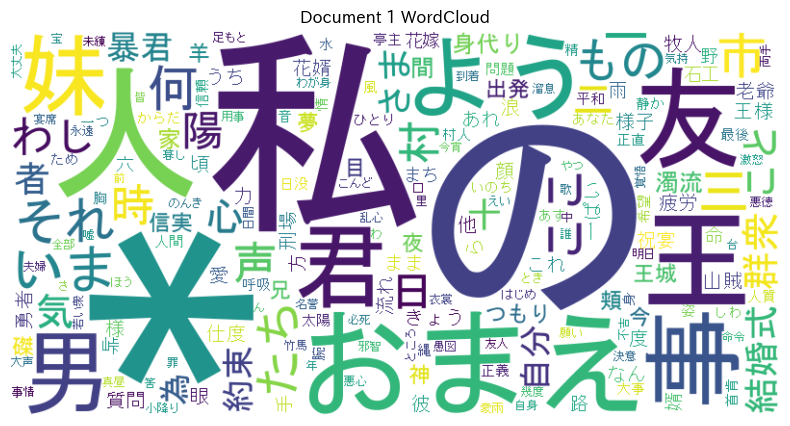

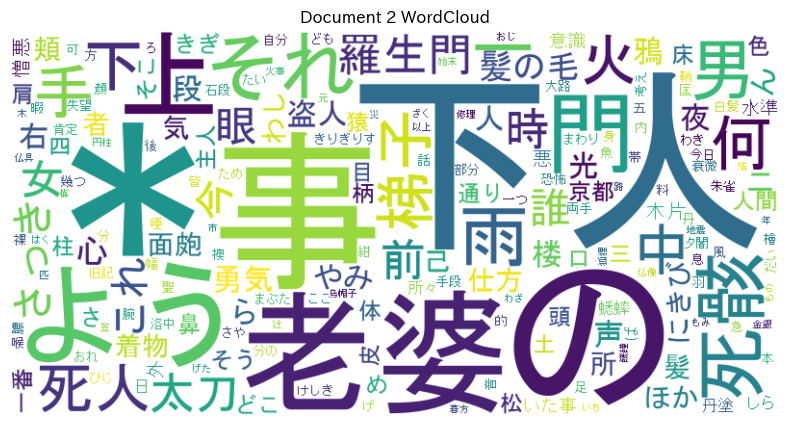

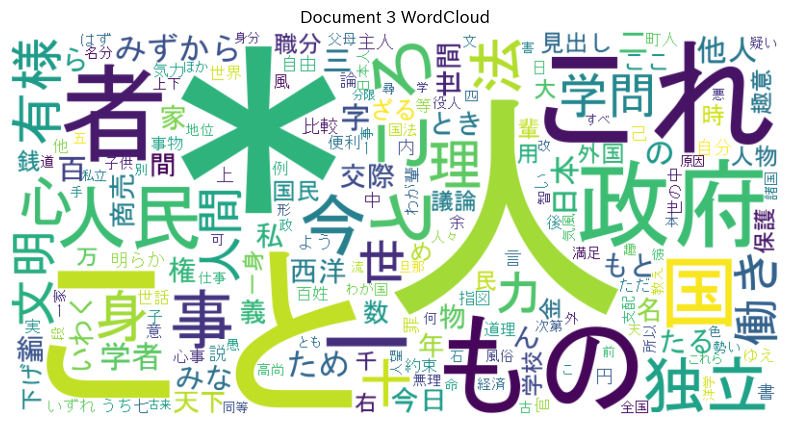

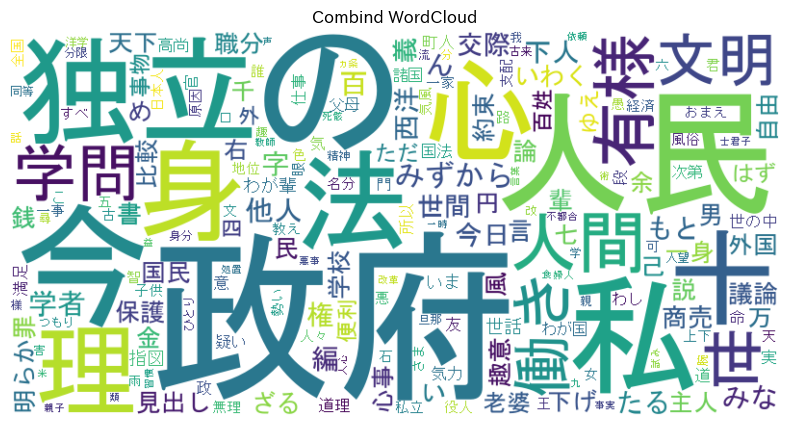

In [127]:
import pandas as pd
import MeCab
import unicodedata
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import japanize_matplotlib
from IPython.display import display

font_path = '‪C:\Windows\Fonts\msgothic.ttc'
with open('data/stop_words.txt', mode='r', encoding='UTF-8') as f:
    stop_words = f.read().split()

# 名詞のみを取りだす
def extra_nouns(df):
    return df[df['品詞'] == '名詞']['原形'].tolist()


# 各文書から名詞を抽出
nouns_per_document = [extra_nouns(df) for df in dataframes_list]

# すべての文書を一つのリストに結合
all_nouns = [noun for nouns in nouns_per_document for noun in nouns]

# ストップワードを適用して単語ごとの頻度をカウント
word_freq = Counter(all_nouns)
for stop_word in stop_words:
    del word_freq[stop_word]

# WordCloudを生成
def generate_wordcloud(data, title):
    cloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate_from_frequencies(data)
    plt.figure(figsize=(10, 5))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

# 各文書ごとのWordCloudを生成
for idx, nouns in enumerate(nouns_per_document):
    document_title = f"Document {idx + 1} WordCloud"
    generate_wordcloud(Counter(nouns), document_title)

# すべての文書をまとめたWordCloudを生成
generate_wordcloud(word_freq, "Combind WordCloud")


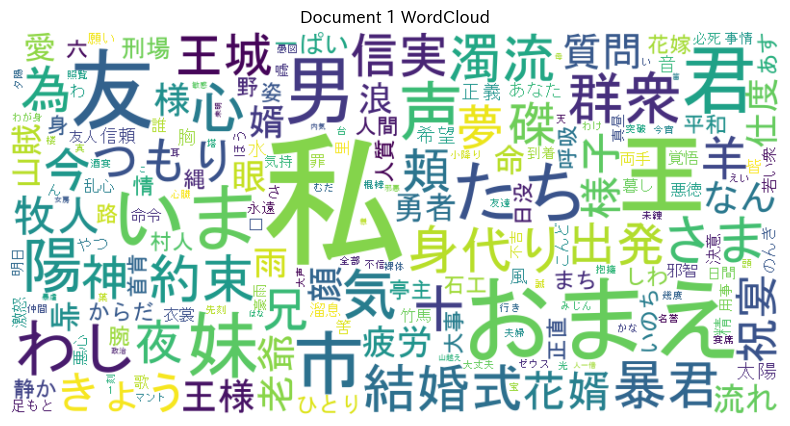

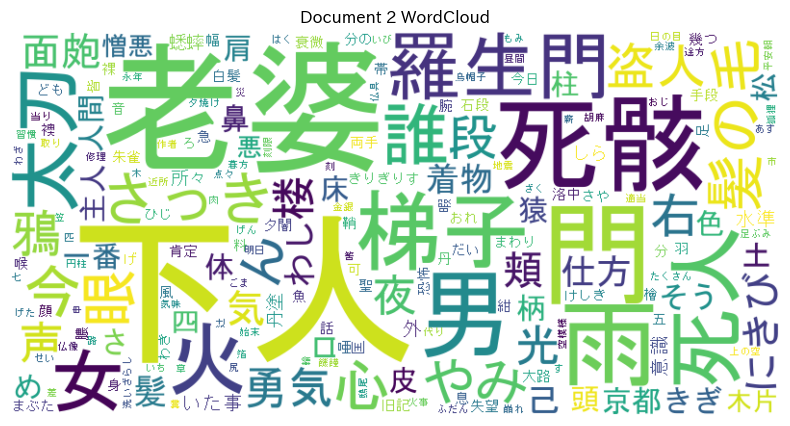

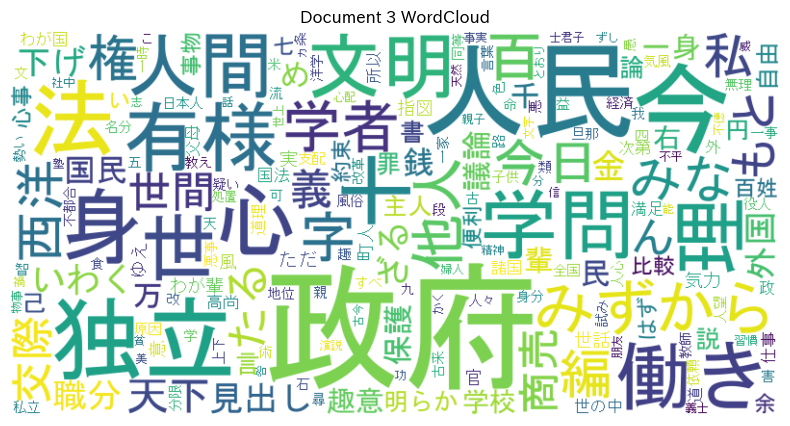

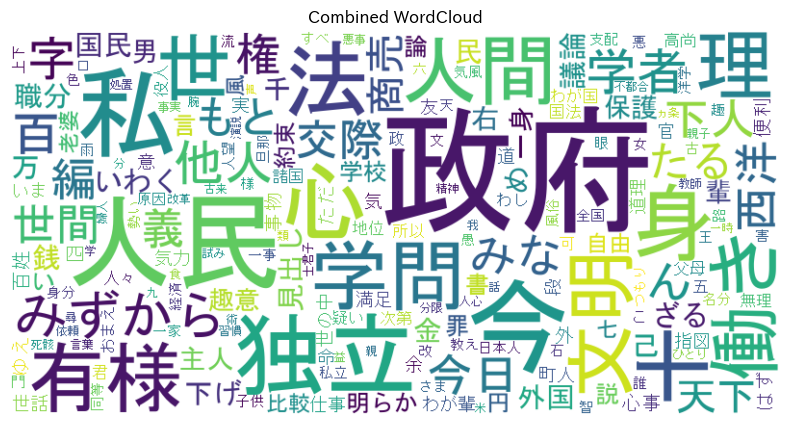

In [137]:
import pandas as pd
import MeCab
import unicodedata
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import japanize_matplotlib
from IPython.display import display

font_path = 'C:/Windows/Fonts/msgothic.ttc'  # フォントのパスを修正
with open('data/stop_words.txt', mode='r', encoding='UTF-8') as f:
    stop_words = f.read().split()

# 名詞（固有名詞を含む）のみを取りだす
def extract_nouns(df):
    return df[df['品詞'] == '名詞']['原形'].tolist()

# 各文書から名詞を抽出
nouns_per_document = [extract_nouns(df) for df in dataframes_list]

# すべての文書を一つのリストに結合
all_nouns = [noun for nouns in nouns_per_document for noun in nouns if noun not in stop_words and noun != '*']

# 単語ごとの頻度をカウント
word_freq = Counter(all_nouns)

# WordCloudを生成
def generate_wordcloud(data, title):
    cloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate_from_frequencies(data)
    plt.figure(figsize=(10, 5))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

# 各文書ごとのWordCloudを生成
for idx, nouns in enumerate(nouns_per_document):
    document_title = f"Document {idx + 1} WordCloud"
    # 単語ごとの頻度をカウントし、ストップワードを除外
    document_word_freq = Counter([word for word in nouns if word not in stop_words and word != '*'])
    generate_wordcloud(document_word_freq, document_title)

# すべての文書をまとめたWordCloudを生成
generate_wordcloud(word_freq, "Combined WordCloud")


<Axes: xlabel='count', ylabel='原形'>

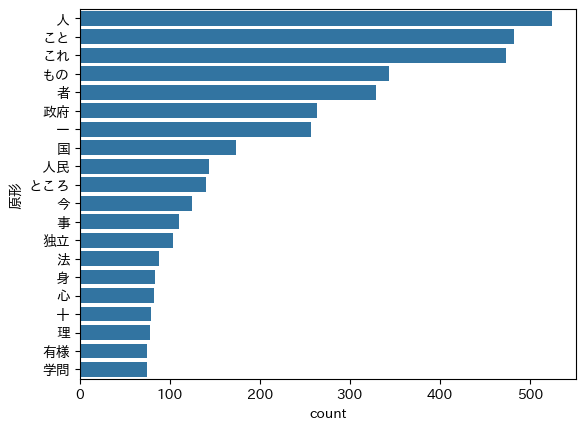

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
plt.figure(figure=(10, 5))
sns.barplot(x=count['count'], y=count['原形'])